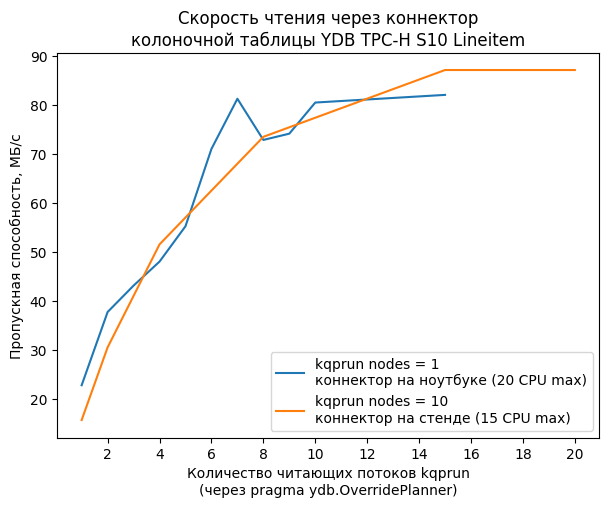

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

data_size = 8450

def make_localhost_df():
    threads = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
    latencies = [371, 224, 196, 176, 153, 119, 104, 116, 114, 105, 103]
    df = pd.DataFrame({'thread': threads, 'latency': latencies})
    df['throughput'] = data_size / df['latency']
    return df

def make_stand_df():
    threads = [1, 2, 4, 8, 15, 20]
    latencies = [539, 277, 164, 115, 97, 97]
    df = pd.DataFrame({'thread': threads, 'latency': latencies})
    df['throughput'] = data_size / df['latency']
    return df

df1 = make_localhost_df()
df2 = make_stand_df()

plt.figure(figsize=(7, 5))  # Optional: specify the figure size

plt.plot(df1['thread'], df1['throughput'], label='kqprun nodes = 1\nконнектор на ноутбуке (20 CPU max)')
plt.plot(df2['thread'], df2['throughput'], label='kqprun nodes = 10\nконнектор на стенде (15 CPU max)')
plt.title('Скорость чтения через коннектор\nколоночной таблицы YDB TPC-H S10 Lineitem')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))  # For x-axis
plt.gca().yaxis.set_major_locator(MultipleLocator(10))  # For y-axi10


plt.xlabel('Количество читающих потоков kqprun\n(через pragma ydb.OverridePlanner)')
plt.ylabel('Пропускная способность, МБ/с')
plt.legend()
plt.show()